<a href="https://colab.research.google.com/github/PrathmeshPawarb/Data-Science-Machine-Learning-Assignments/blob/main/KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [79]:
zoo = pd.read_csv('/content/Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [80]:
df = zoo.iloc[:,1:]
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [81]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [82]:
#spliting data

x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

n = np.array(range(3,31))                               #Creating array for k value from 3 to 31.
parameter = dict(n_neighbors=n)                         #Creating Dictonary containing these k values.


model = KNeighborsClassifier()                           # Using GridSearchCV with model=(knn)and parameter
grid = GridSearchCV(estimator=model, param_grid=parameter)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [85]:
print(grid.best_score_)             #Score
print(grid.best_params_)            #for cluster nos.

0.93
{'n_neighbors': 3}


#visualization

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
k_values = [i for i in range (1,31)]
scores = []



for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

scores

[0.97,
 0.9199999999999999,
 0.93,
 0.9004761904761904,
 0.8509523809523811,
 0.8509523809523811,
 0.8414285714285714,
 0.8014285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.7419047619047618,
 0.7228571428571429,
 0.7128571428571429,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.6928571428571428,
 0.6928571428571428,
 0.6128571428571428]

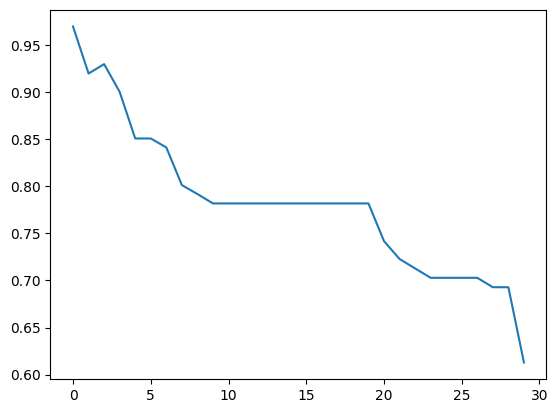

In [88]:
plt.plot(scores)


In [89]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

knn.score(x,y)

0.9801980198019802

In [90]:
# Prediction

ypred = knn.predict(x)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y)

0.9801980198019802

In [92]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,ypred)
cm

array([[41,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  1,  1,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0, 10]])

<Axes: >

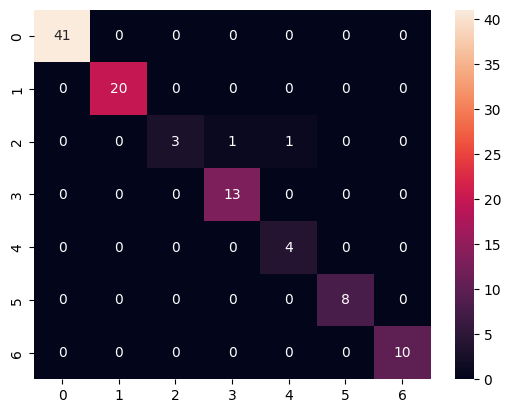

In [93]:
sns.heatmap(cm, annot= True)

#Glass

In [94]:
glass = pd.read_csv('/content/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [95]:
# splitting into dependent and independent variable

x1 = glass.iloc[:,:-1]
y1 = glass.iloc[:,-1]


In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x1 = sc.fit_transform(x1)
x1

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [97]:
#splitting Test train data

from sklearn.model_selection import train_test_split

x1test,x1train,y1test,y1train = train_test_split(x1, y1, test_size=0.20, random_state=5)

In [98]:
y1test

39     1
56     1
40     1
51     1
160    3
      ..
144    2
118    2
189    7
206    7
99     2
Name: Type, Length: 171, dtype: int64

In [99]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

n = np.array(range(1,31))                               #Creating array for k value from 3 to 31.
parameter = dict(n_neighbors=n)                         #Creating Dictonary containing these k values.


model = KNeighborsClassifier()                           # Using GridSearchCV with model=(knn)and parameter
grid = GridSearchCV(estimator=model, param_grid=parameter)
grid.fit(x1train, y1train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [100]:
print(grid.best_score_)             #Score
print(grid.best_params_)            #for cluster nos.

0.65
{'n_neighbors': 7}


#visualization

In [101]:
k_values = [i for i in range (1,31)]
scores1 = []



for k in k_values:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    score1 = cross_val_score(knn1, x1train, y1train, cv=5)
    scores1.append(np.mean(score1))

scores1

[0.625,
 0.5777777777777777,
 0.6027777777777777,
 0.5583333333333333,
 0.6027777777777777,
 0.6027777777777777,
 0.65,
 0.5583333333333333,
 0.513888888888889,
 0.513888888888889,
 0.4416666666666666,
 0.4416666666666666,
 0.41666666666666663,
 0.41666666666666663,
 0.39444444444444443,
 0.3722222222222222,
 0.39444444444444443,
 0.39444444444444443,
 0.39444444444444443,
 0.37222222222222223,
 0.39444444444444443,
 0.37222222222222223,
 0.4138888888888889,
 0.41666666666666663,
 0.3472222222222222,
 0.43888888888888894,
 0.39444444444444443,
 0.3722222222222222,
 0.3722222222222222,
 0.3722222222222222]

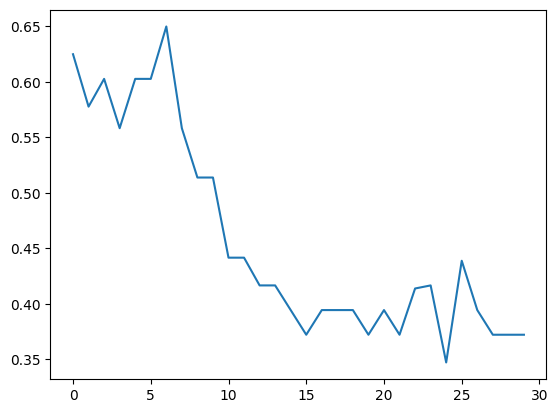

In [102]:
plt.plot(scores1)

In [107]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(x1train,y1train)

knn1.score(x1train,y1train)

0.6744186046511628

In [115]:
y1pred = knn1.predict(x1test)
y1pred

array([1, 2, 1, 1, 1, 1, 2, 7, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1,
       2, 1, 1, 7, 7, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 7, 2, 1, 2, 7, 2, 1, 2, 1, 1, 2, 7, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7,
       7, 1, 1, 2, 1, 2, 1, 2, 2, 1, 7, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 7, 2, 1, 1, 1, 1, 1, 7, 1, 1, 2, 2, 7, 1, 1, 1, 1, 1, 2, 1,
       7, 2, 1, 2, 1, 1, 1, 2, 7, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 7, 1, 2, 1, 1, 1, 1, 7, 2, 2, 1, 2, 1, 7, 1])

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y1pred,y1test)

0.5380116959064327

In [117]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y1test,y1pred)
cm1

array([[44, 10,  0,  0,  0,  0],
       [31, 30,  0,  0,  0,  0],
       [12,  3,  0,  0,  0,  0],
       [ 7,  4,  0,  0,  0,  1],
       [ 4,  1,  0,  0,  0,  2],
       [ 3,  1,  0,  0,  0, 18]])

Text(50.722222222222214, 0.5, 'true')

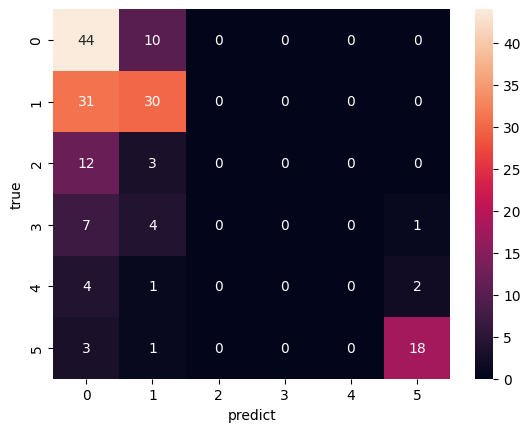

In [118]:
sns.heatmap(cm1, annot= True)
plt.xlabel('predict')
plt.ylabel('true')